In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [3]:
def img_bw_data(imgpath):
    # type: (object) -> object
    img = Image.open(imgpath)
    img_bw = img.convert('L')
    pixels_array = np.where(np.asarray(img_bw) > 255/2, 0, 1)
    return pixels_array

In [4]:
imgpath = '/Users/hechengwang/Downloads/Files/0a0a5dc8-b613-47cd-a2ca-a4d001159541.png'
datapath = '/Users/hechengwang/Downloads/Files/listOfFields.csv'

In [5]:
img0 = img_bw_data(imgpath)

In [6]:
def get_one_groups(line, line_qualifier):
    pixel_index = 0
    pixel_final = 0
    one_groups = []
    for i, pixel in enumerate(line):
        if pixel == 1:
            if pixel_index:
                pixel_final = i
            else:
                pixel_index = i
        else:
            if pixel_final - line_qualifier > pixel_index:
                one_groups.append((pixel_index, pixel_final))
            pixel_index = 0
            pixel_final = 0
    return one_groups
def get_one_array(img, line_qualifier):
    one_array = np.zeros(img.shape)
    for i, line in enumerate(img):
        one_groups = get_one_groups(line, line_qualifier)
        for group in one_groups:
            one_array[i, group[0]:group[1]] = 1
    return one_array

In [7]:
img1 = get_one_array(img0, 50)

In [8]:
img1

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [9]:
image_height, image_width = img0.shape

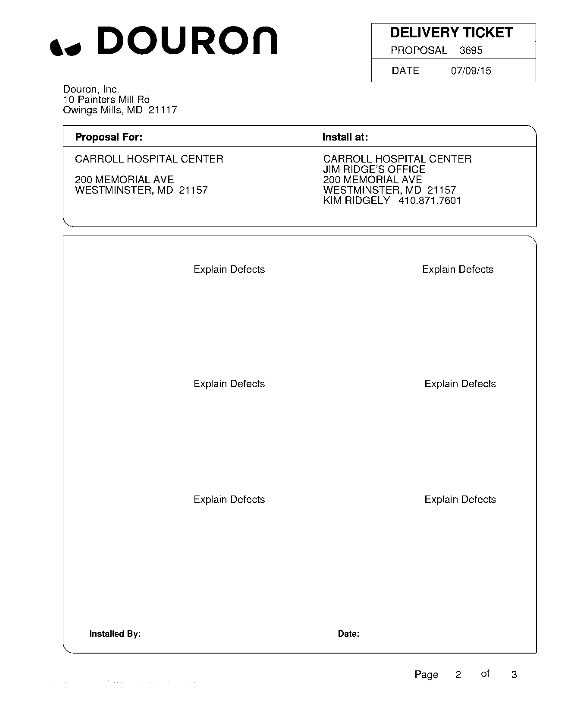

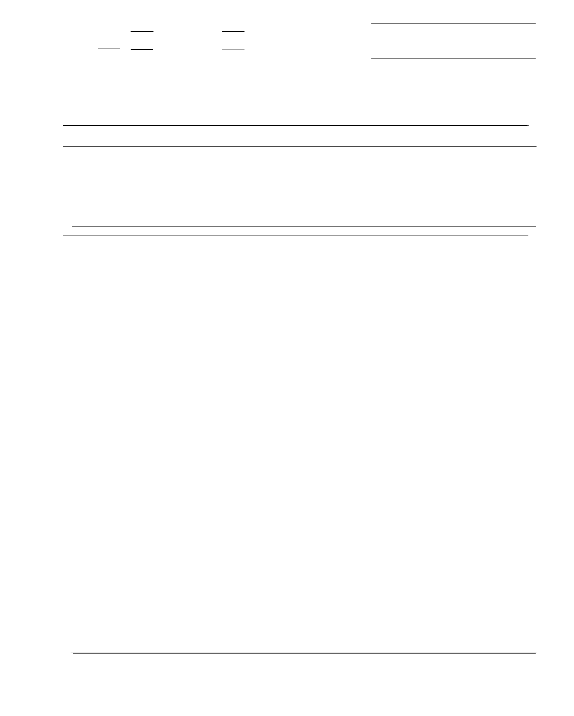

In [10]:
# display image
def display(img):
    plt.figure(figsize = np.multiply(img.shape, 0.01))
    plt.axis('off')
    plt.imshow(img, cmap=cm.binary)

# output image
display(img0)
display(img1)

In [11]:
data = pd.read_csv(datapath)

In [12]:
data.head()

,ImagePath,X,Y,W,H,PageNumber
0,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1675,648,45,45,1
1,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1512,280,45,45,1
2,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1607,747,45,45,1
3,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1560,508,45,45,1
4,Files/1cb80003-7a64-48bf-9083-a32200ce6d09.png,1560,202,47,47,1


In [13]:
data['full_imgpath'] = '/Users/hechengwang/Downloads/' + data['ImagePath']

In [14]:
img_dict = {}
imgname = 'Files/61da3226-1b6d-4e8d-ac6f-a2ed018669cf.png'

for index, row in data[data['ImagePath'] == imgname].iterrows():
    filepath = row['full_imgpath'].split('/')[-1]
    if not filepath in img_dict:
        img = img_bw_data(row['full_imgpath'])
        img_dict[filepath] = [img, np.zeros(img.shape)]
        x, y, x1, y1 = row['X'], row['Y'], row['X'] + row['W'], row['Y'] + row['H']
        img_dict[filepath][-1][y:y1, x:x1] = np.ones((y1 - y, x1 - x))
    else:
        x, y, x1, y1 = row['X'], row['Y'], row['X'] + row['W'], row['Y'] + row['H']
        img_dict[filepath][-1][y:y1, x:x1] = np.ones((y1 - y, x1 - x))

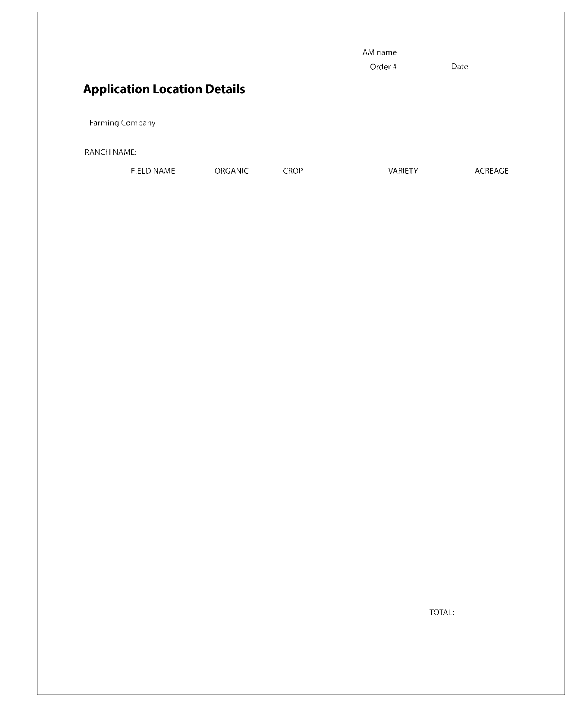

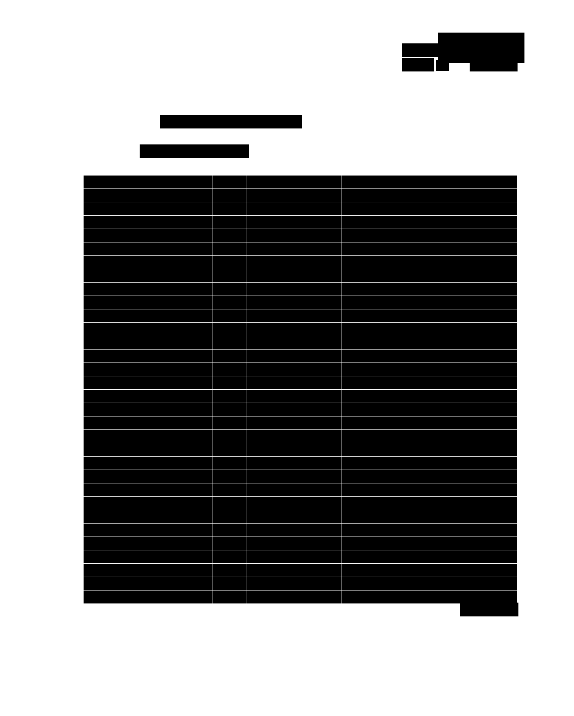

In [15]:
display(img_dict.values()[0][0])
display(img_dict.values()[0][1])

In [16]:
len(data[data['ImagePath'] == imgname])

232

In [20]:
import pytesseract as pyt

In [30]:
pyt_string = pyt.image_to_string(Image.open(imgpath), boxes=True)

In [34]:
pyt_string_split = pyt_string.split('\n')

In [38]:
[split.split() for split in pyt_string_split]

[['3', '30', '1480', '70', '1553', '0'], ['3', '63', '1480', '103', '1553', '0'], ['D', '142', '1484', '200', '1548', '0'], ['O', '210', '1483', '278', '1549', '0'], ['U', '289', '1484', '344', '1548', '0'], ['R', '359', '1484', '414', '1548', '0'], ['O', '422', '1483', '490', '1549', '0'], ['n', '501', '1484', '557', '1548', '0'], ['i', '142', '1430', '147', '1462', '0'], ['n', '154', '1430', '175', '1454', '0'], ['s', '180', '1429', '199', '1454', '0'], ['p', '204', '1423', '229', '1454', '0'], ['i', '234', '1430', '240', '1462', '0'], ['r', '247', '1430', '261', '1454', '0'], ['a', '263', '1429', '284', '1454', '0'], ['t', '288', '1429', '303', '1460', '0'], ['i', '309', '1430', '314', '1462', '0'], ['o', '320', '1429', '345', '1454', '0'], ['n', '351', '1430', '372', '1454', '0'], ['a', '390', '1429', '412', '1454', '0'], ['t', '416', '1429', '431', '1460', '0'], ['w', '448', '1430', '483', '1453', '0'], ['o', '486', '1429', '511', '1454', '0'], ['r', '516', '1430', '530', '1454', 